In [111]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

$$
\newcommand{\pdd}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\d}{\mathrm{d}}
\newcommand{\dd}[2]{\frac{\d #1}{\d #2}}
\newcommand{\si}{~\mathrm}
$$

### Simple Radiation Scheme

$$
\newcommand{\Fup}{F^\uparrow}
\newcommand{\Fdn}{F^\downarrow}
$$

We are using the Schwartzchild equations for the upward and downward longwave flux as a function of optical depth

\begin{align}
    \dd{\Fup}{\chi} &= \Fup - \pi B \\
    -\dd{\Fdn}{\chi} &= \Fdn - \pi B
\end{align}

Assuming the system is in equilibrium, then the outgoing longwave flux must be equal to the total emitted surface flux

\begin{equation}
\Fup_0 = \Fup_s = \sigma T_s^4
\end{equation}

and there is no net flux at any level through the atmosphere

$$ \dd{}{\chi} \left( \Fup - \Fdn \right) = 0 $$

Given a surface flux $F_0$ we find the relationship

$$ \Fup - \Fdn = F_0 $$

must hold at all pressure levels in the atmosphere.  Furthermore

$$ \dd{}{\chi} \left( \Fup + \Fdn \right) = \Fup - \Fdn = F_0 $$

which can be integrated to give the analytic solutions to the two streams:

\begin{align}
    \Fup &= \frac{F_0}{2} (2 + \chi) \\
    \Fdn &= \frac{F_0}{2} \chi
\end{align}




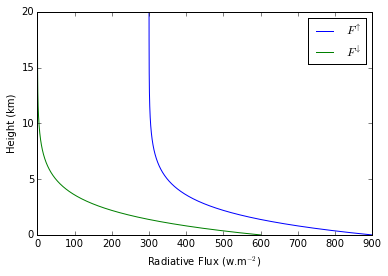

In [112]:
sigma = 5.67e-8

H = 2.0       # scale height in km (from [Salby 1996] - H20 is main absorber and has scale height of approx 2km)
chi0 = 4.0    # optical depth at the surface
nz = 1000     # number of levels in in atmosphere
z = np.linspace(0, 20, nz)  # 0 - 20km
chi = chi0*np.exp(-z / H)

F0 = 300.0    # Surface flux in W/m^2. i.e. Solar insolation reaching surface
Fup = F0/2 * (2 + chi)
Fdn = F0*chi / 2
plt.plot(Fup, z, label='$F^\uparrow$')
plt.plot(Fdn, z, label='$F^\downarrow$')
plt.legend()
plt.xlabel('Radiative Flux (w.m$^{-2}$)')
plt.ylabel('Height (km)')

As there is no net flux combining the two stream equations we can derive a the temperature profile of an atmosphere in radiative equilibrium:

\begin{align}
    \dd{}{\chi} \left( \Fup - \Fdn \right) &= \Fup + \Fdn - 2 \pi B  = 0 \\
    \implies  2 \pi B &= \Fup + \Fdn
\end{align}

From Plank's formula for a black body $2 \pi B = \sigma T^4$ and substituting the solutions to $\Fup$ and $\Fdn$ we get the temperature profile

$$ T = \left( \frac{F_0}{2\sigma}(1 + \chi) \right)^\frac{1}{4} $$

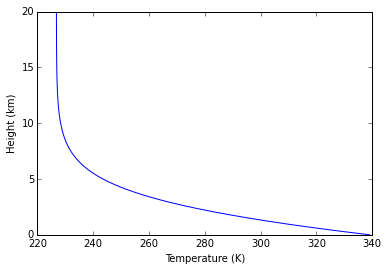

In [113]:
rad_T = (F0 / (2.0*sigma) * (1 + chi))**0.25
plt.plot(rad_T, z)
plt.xlabel('Temperature (K)')
plt.ylabel('Height (km)')

### Radiative-Convective Equilibrium

When the troposphere becomes unstable, convection kicks in and transports hotter parcels of air higher.  The parcels continue to move higher while they are less dense than the air surrounding them, diabatically cooling until they reach the level of neutral buoyancy.

The process of convection stabilises the atmosphere to a temperature profile that closely follows an adiabat - divergence from this profile is quickly neutralised by the convective process.

Therefore if we assume radiative-convective equilibrium, we can prescribe a fixed temperature profile in the troposphere, the lapse rate:

$$ \dd{T}{z} = -\Gamma(z) $$

For simplicty choose a linear lapse rate (to first order, a somewhat decent approximation to the adiabat)

\begin{align}
    \Gamma &= 6.5 \si{K.km^{-1}} \\
    \implies T &= T_s - \Gamma z
\end{align}

In [130]:
Ts = 284.0  # Surface temperature in Kelvin
lapse_rate = 6.5    # K.km^-1

dchi = np.diff(chi)
T = Ts - lapse_rate*z
T[(z > 5) & (T < rad_T)] = rad_T[(z> 5) & (T < rad_T)]  # stop convective lapse rate in stratosphere 
piB = sigma*T**4
pFup = piB[0]   # surface radiation σTs^4
Fup_l = [pFup]
for piB_, dchi_ in zip(piB[1:], dchi):
    dFup = (pFup - piB_)*dchi_
    pFup = pFup + dFup
    Fup_l.append(pFup)
    
pFdn = 0.0         # no incoming LW radiation at TOA
Fdn_l = [pFdn]
# integrate from top of atmosphere down
for piB_, dchi_ in zip(piB[1:], dchi)[::-1]:
    dFdn = (pFdn - piB_)*dchi_
    pFdn = pFdn + dFdn
    Fdn_l.append(pFdn)

Fdn_l = Fdn_l[::-1]

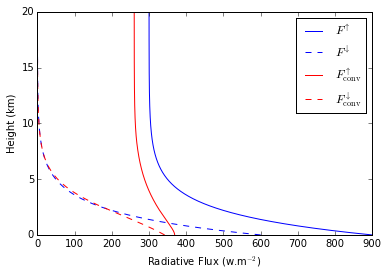

In [131]:
plt.plot(Fup, z, label='$F^\uparrow$', color='blue')
plt.plot(Fdn, z, label='$F^\downarrow$', color='blue', linestyle='--')

plt.xlabel('Radiative Flux (w.m$^{-2}$)')
plt.ylabel('Height (km)')
plt.plot(Fup_l, z, label='$F^\uparrow_\mathrm{conv}$', color='red')
plt.plot(Fdn_l, z, label='$F^\downarrow_\mathrm{conv}$', color='red', linestyle='--')

plt.legend()

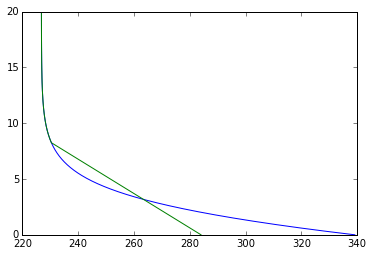

In [132]:
plt.plot(rad_T, z)
plt.plot(T, z)

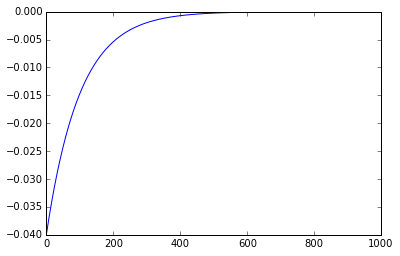

In [120]:
plt.plot(dchi)